# Angular Momentum Loss Rate Details:
![picture](https://drive.google.com/uc?export=view&id=1Q2eIjEDzNL_4b-EddvwEelCBXewtffqb)

# Pre Main Sequence Star Scenario:
### Range of M=1.2 to 4 Solar Masses
### Spin Period, $P_{spin}$=
### Stellar Surface magnetic field, $B_s$=
### $R_2$=
### Wind mass loss rate, $\frac{dM}{dt}$ or $M_{w}$=
### Universal Gravitational Constant, G=
### $M_2$=

# $$
    J_{2,MB}=-\frac{2\pi}{P_{spin}}B_s {R_2}^\frac{13}{4} {M_w}^\frac{1}{2} {(G M_2)}^{-\frac{1}{4}}
$$



# Importing the required python libraries

In [65]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sb

# Declaration of Variables and Defining Functions

In [107]:
# Running this cell without initialising would give errors. Careful!
pi=np.pi 
B_s= 10
R_2=np.arange(2.4,1.2,-0.1)
M_w=10e-9
G=6.67408e-11
M_2=np.arange(0.7,4,0.1)
P_spin=1
M_sun=1.989e30
M=M_2*M_sun
R_sun=6.9e8
R=R_2*R_sun
J_list=[[(2*pi/P_spin)*B_s*((R2)**(13/4))*(M_w**(1/2))*((G*M2)**(-1/4)) for M2 in M_2] for R2 in R_2]
J_list

def J(Massl,Radiusl):
    #Massl and Radiusl are lists of M_2 and R_2 respectively
    return [[(2*pi/P_spin)*B_s*((Radius)**(13/4))*(M_w**(1/2))*((G*Mass)**(-1/4))for Mass in Massl] for Radius in Radiusl]

## Plot-1 
# $J_{2,MB}$ against $M_2$ and $R_2$

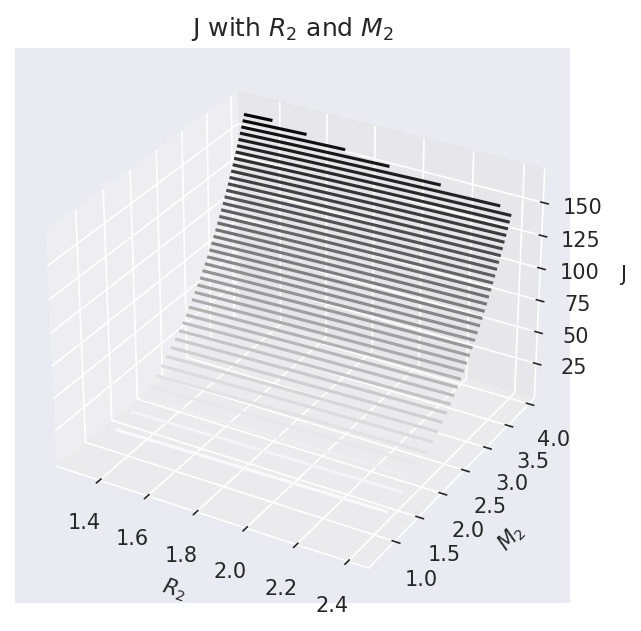

In [108]:
x = np.array(R_2)
y = np.array(M_2)

X, Y = np.meshgrid(x, y)
Z = np.array(J(x, y))

fig = plt.figure(dpi=150)
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
plt.tight_layout()

ax.set_xlabel('$R_2$')
ax.set_ylabel('$M_2$')
ax.set_zlabel('J')
ax.set_title('J with $R_2$ and $M_2$')


plt.show()

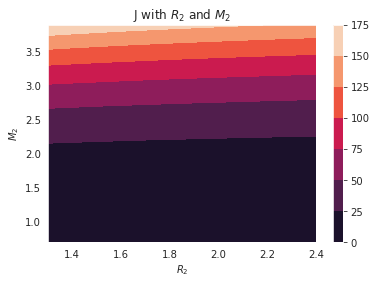

In [68]:
x = np.array(R_2)
y = np.array(M_2)

X, Y = np.meshgrid(x, y)
Z = np.array(J(x, y))

fig,ax=plt.subplots(1,1)
ax.contourf(X, Y, Z)


cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('J with $R_2$ and $M_2$')

ax.set_xlabel('$R_2$')
ax.set_ylabel('$M_2$')
plt.show()

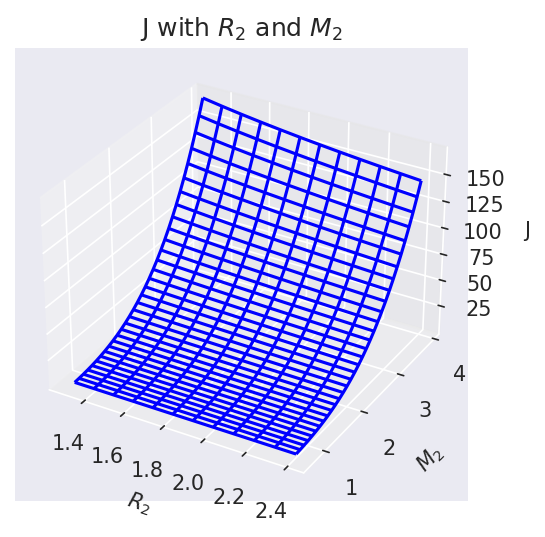

In [69]:
x = np.array(R_2)
y = np.array(M_2)

X, Y = np.meshgrid(x, y)
Z = np.array(J(x, y))

fig = plt.figure(dpi=150)
ax = plt.axes(projection='3d')

ax.plot_wireframe(X, Y, Z, color='blue')
ax.set_xlabel('$R_2$')
ax.set_ylabel('$M_2$')
ax.set_zlabel('J')
ax.set_title('J with $R_2$ and $M_2$')





plt.show()

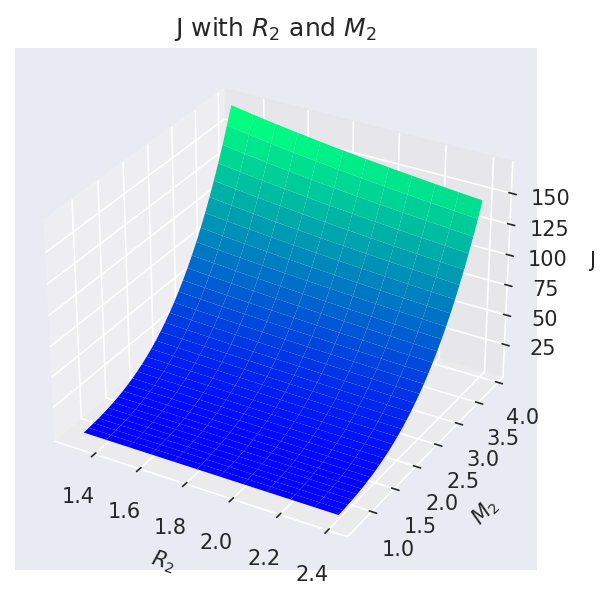

In [70]:
plt.figure(dpi=150)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='winter', edgecolor='none')
ax.set_xlabel('$R_2$')
ax.set_ylabel('$M_2$')
ax.set_zlabel('J')
ax.set_title('J with $R_2$ and $M_2$')
plt.tight_layout()

# Wind Mass Loss Rate

## $$f=\frac{\dot{M}_{acc}}{\dot{M}_w}=2\times10^{-3}(\frac{M_2}{P_d})^{\frac{4}{3}}[\frac{V_w}{1000 kms^{-1}}]^{-4}$$

## Total Mass Loss:
## $$-\dot{M}_2=\dot{M}_w+\dot{M}_{2rlo}$$
## $$\dot{M}_{2rlo}=\frac{1}{e^{\frac{1}{2}}}\rho C_{th} Q [\frac{R_{2}-R_{1,2}}{H_p\gamma(q)}]$$
## , where
 ## $$H_p\gamma(q)=(H_p)_{o}=\frac{RT_2{R_{2R}^2}}{MGM_2}$$

# Importing the required python libraries

In [71]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sb
import math

# Declaration of Variables and Defining Functions

In [72]:
V_w=np.linspace(500,1500,1000)
M_2=2.6
P_d=2.6
q=2.42
rho=1e-8
C_th=211.58
gamma=1.4219
H_p=15585.95
R_sun=6.4e4
R_2=4.85*R_sun
R_1=15.8*R_sun

H_xD2=np.linspace(2000,2500,10)

def f(V_w_list):
    return [(2e-3)*((M_2/P_d)**(4/3))*((Vw/1000)**(-4)) for Vw in V_w_list]

    


#we should initialize things outside the function ig yes correct

def M_rlo(H_xD):
   return [ (1/(math.e)**0.5)*rho*C_th*q*((R_2-R_1)/H_xDel) for H_xDel in H_xD ]
    
#bro it is np.exp np.exp?? okok fines

# $M_{rlo}$ vs $H_p\gamma(q)$

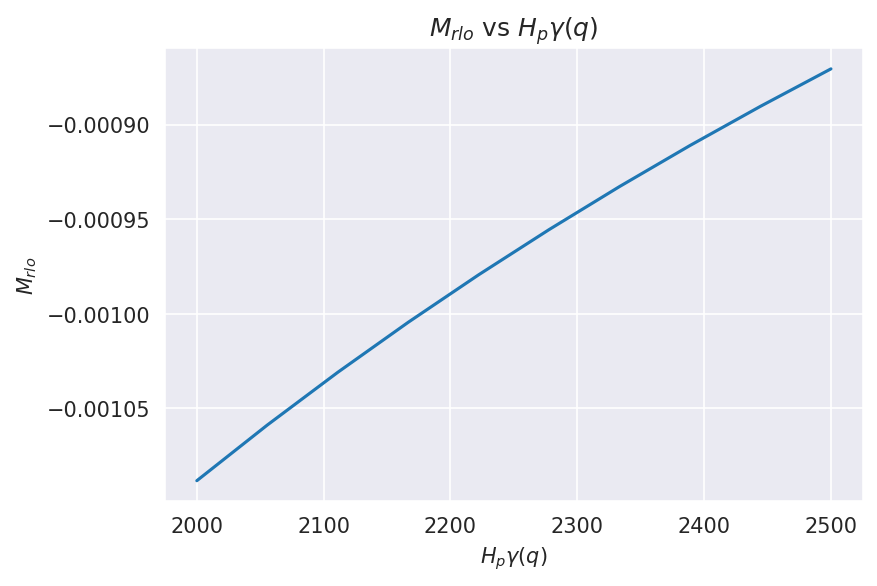

In [73]:
x=np.array(H_xD2)
y=np.array(M_rlo(x))

plt.figure(dpi=150)
plt.plot(x,y)

plt.xlabel('$H_p\gamma(q)$')
plt.ylabel('$M_{rlo}$')
plt.title('$M_{rlo}$ vs $H_p\gamma(q)$')

plt.show()
sb.set_style('darkgrid')

# f vs $V_w$ plot

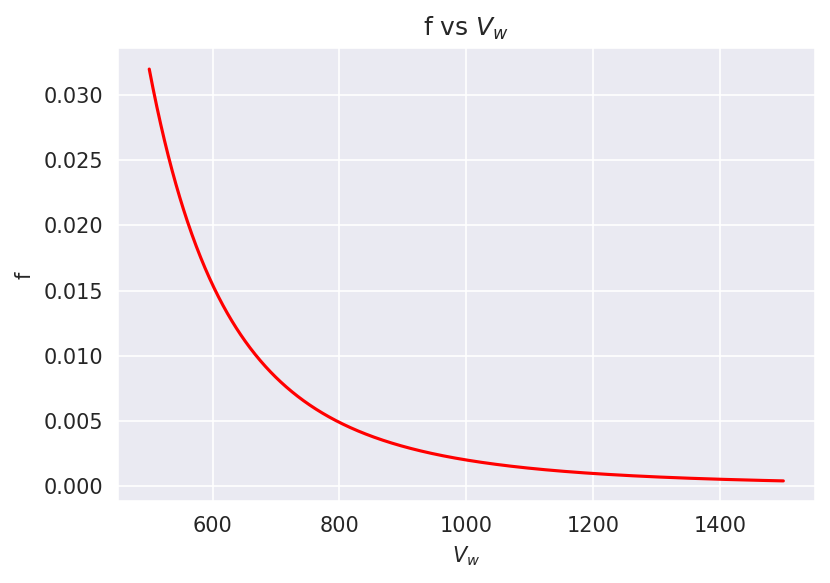

In [74]:
x=np.array(V_w)
y=np.array(f(x))

plt.figure(dpi=150)

plt.plot(x,y,'r')
plt.ylabel('f')
plt.xlabel('$V_w$')
plt.title('f vs $V_w$')
plt.show()
sb.set_style('darkgrid')

# Mass Gained By Blackhole: xD

## $$\dot{M}_{tot}=\dot{M}_{acc}+\dot{M}_{2rlo}$$


## $$\hspace{11mm}=2x10^{-3}[\frac{V_w}{1000kms^{-1}}]\dot{M}_w+\dot{M}_{2rlo}$$

## $$\Rightarrow \dot{M}_{acc}=2.99\times10^{-16}(\frac{fd^2}{c^2})(\frac{M_{BH}}{M_\odot})^{-1}\dot{M}_{Edd}$$

## $$\dot{M}_{Edd}=1.44\times10^{17}(\frac{M_{BH}}{M\odot})gs^{-1}$$



# Importing the required python libraries

In [75]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sb

# Declaration of Variables and Defining Functions

In [76]:
f=1
c=3e8
d=4.85*R_sun
M_bh=np.arange(10*M_sun,15*M_sun,1e30)
M_accr=2.99*14.4*(f*(d**2))/(c**2)*M_bh

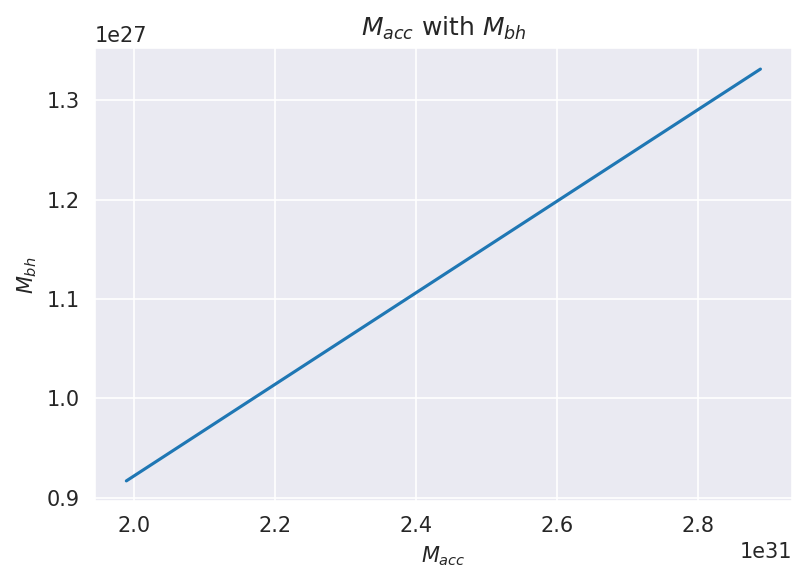

In [103]:
x=np.array(M_bh)
y=np.array(M_accr)

plt.figure(dpi=150)
plt.plot(x,y)
plt.xlabel('$M_{acc}$')
plt.ylabel('$M_{bh}$')
plt.title('$M_{acc}$ with $M_{bh}$')
plt.show()
 

# Kinetic Jet Power:

## $$L_{jet}^{max}=R_m^{max}\times\dot{M}_{acc}\times c^2$$

## $$L_{jet}^{max}=0.17\times\dot{M}_{acc}\times c^2$$

## $$Outflow \hspace{2mm}mass=0.17\times\dot{M}_{acc}$$

# Importing the required python libraries

In [78]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sb

# Declaration of Variables and Defining Functions

In [79]:
c=3e8
R_max=0.17
M=1.989e30
M_1=M*(1e-8)
M_2=M*(1e-6)

M_acc=np.linspace(M_1,M_2,1000)
# commemts pleamse henlo
def L_jet(M_acc_list):
    return [0.17*M_acc*(c**2) for M_acc in M_acc_list]
def M_out(M_acc_listt):
    return [0.17*M_acc for M_acc in M_acc_listt]

# Plotting Parameters 1
# Kya ho raha hain
# Yeh code cell nahi hain xD

i just realised fml

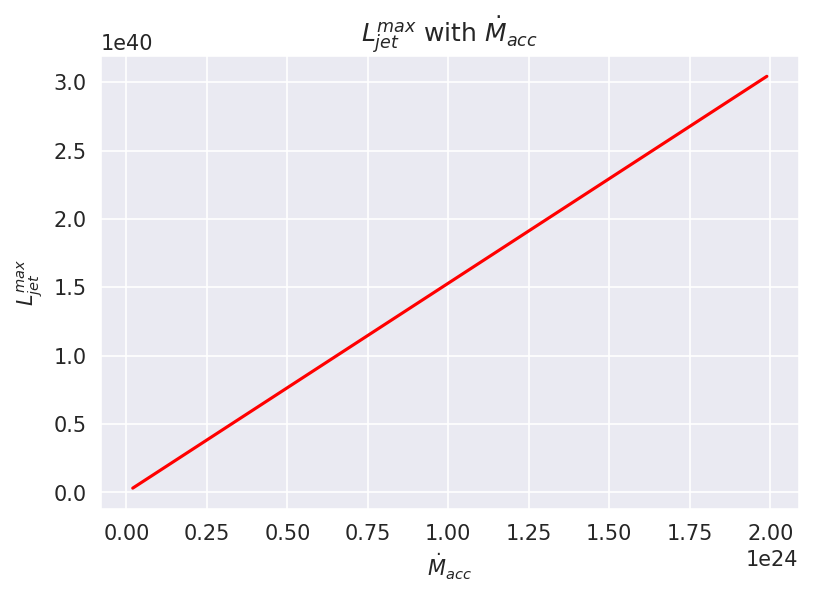

In [80]:
x=np.array(M_acc)
y=np.array(L_jet(x))

plt.figure(dpi=150)

plt.plot(x,y,'r-')
plt.xlabel('$\dot{M}_{acc}$')
plt.ylabel('$L_{jet}^{max}$')
plt.title('$L_{jet}^{max}$ with $\dot{M}_{acc}$')
plt.show()


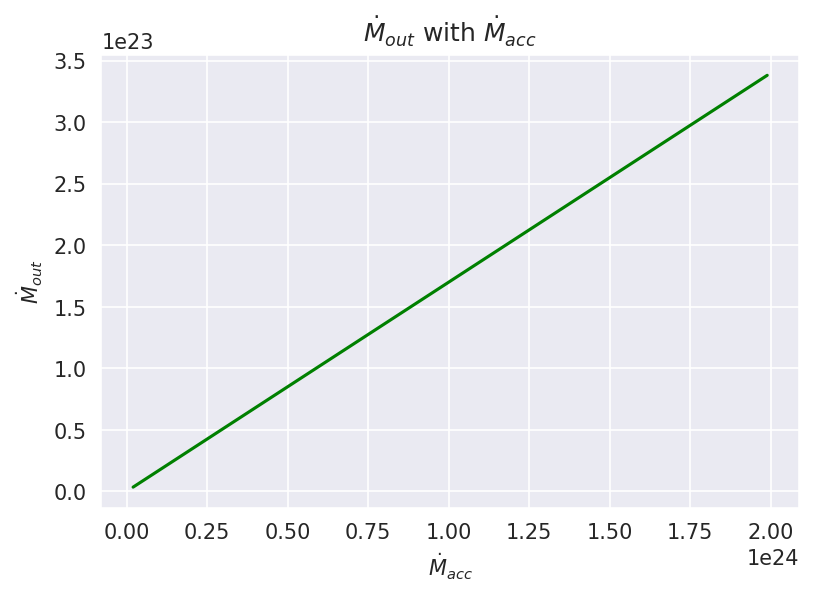

In [81]:
x=np.array(M_acc)
y=np.array(M_out(x))

plt.figure(dpi=150)



plt.plot(x,y,'g-')
plt.xlabel('$\dot{M}_{acc}$')
plt.ylabel('$\dot{M}_{out}$')
plt.title('$\dot{M}_{out}$ with $\dot{M}_{acc}$ ')
plt.show()

# Ghost Mass

## Total Ghost Mass = $(1-f)\dot{M}_w+0.17\times\dot{M}_{acc}$

# Importing the required python libraries

In [153]:
%matplotlib inline

from mpl_toolkits.mplot3d import axes3d

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sb

# Declaration of Variables and Defining Functions

In [154]:
M_w=np.linspace(1e-11,1e-6,100)
M_acc=np.linspace(1e-7,1e-8,100)
#M_gh=M_w-M_acc*(0.83)

def mgh(M_wl,M_accrl):
        return [[(Mw-Ma*0.83)for Mw in M_wl]for Ma in M_accrl]

mghl=mgh(M_w,M_acc)
print(mghl)

[[-8.298999999999999e-08, -7.28890909090909e-08, -6.27881818181818e-08, -5.268727272727272e-08, -4.258636363636363e-08, -3.2485454545454544e-08, -2.238454545454545e-08, -1.2283636363636362e-08, -2.182727272727274e-09, 7.918181818181814e-09, 1.8019090909090902e-08, 2.811999999999999e-08, 3.8220909090909104e-08, 4.832181818181819e-08, 5.842272727272728e-08, 6.852363636363637e-08, 7.862454545454546e-08, 8.872545454545454e-08, 9.882636363636363e-08, 1.0892727272727272e-07, 1.1902818181818181e-07, 1.291290909090909e-07, 1.3922999999999998e-07, 1.4933090909090907e-07, 1.5943181818181819e-07, 1.6953272727272725e-07, 1.7963363636363636e-07, 1.8973454545454542e-07, 1.9983545454545454e-07, 2.099363636363636e-07, 2.2003727272727271e-07, 2.3013818181818177e-07, 2.402390909090909e-07, 2.5034e-07, 2.6044090909090907e-07, 2.705418181818182e-07, 2.8064272727272724e-07, 2.9074363636363636e-07, 3.008445454545454e-07, 3.1094545454545453e-07, 3.210463636363636e-07, 3.311472727272727e-07, 3.412481818181817

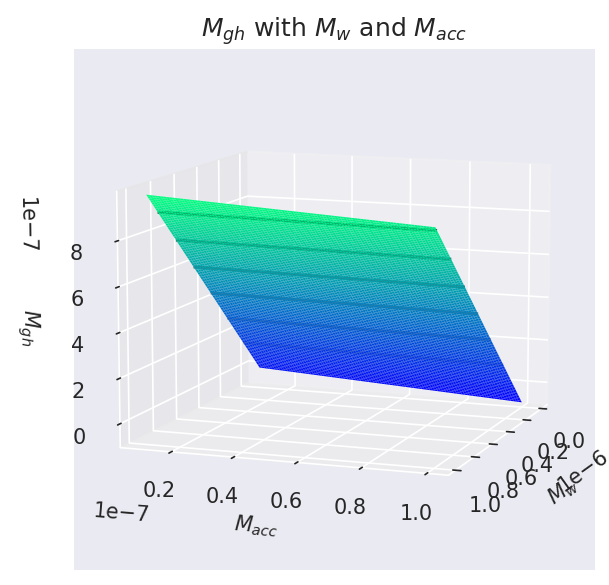

In [177]:
x = np.array(M_w)
y = np.array(M_acc)

X, Y = np.meshgrid(x, y)
Z = np.array(mgh(x,y))

plt.figure(dpi=150)
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, cmap='binary')
plt.tight_layout()

#ax.set_xlabel('$R_2$')
#ax.set_ylabel('$M_2$')
#ax.set_zlabel('J')
#ax.set_title('J with $R_2$ and $M_2$')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='winter', edgecolor='none')
ax.set_xlabel('$M_w$')
ax.set_ylabel('$M_{acc}$')
ax.set_zlabel('$M_{gh}$')
ax.set_title('$M_{gh}$ with $M_w$ and $M_{acc}$')
plt.tight_layout()

ax.view_init(10,20)



# Total Evolution


## Black hole's mass evolution =$ -0.17\times\dot{M}_{acc}+\dot{M}_{tot}$

# Importing the required python libraries

In [84]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sb

# Declaration of Variables and Defining Functions

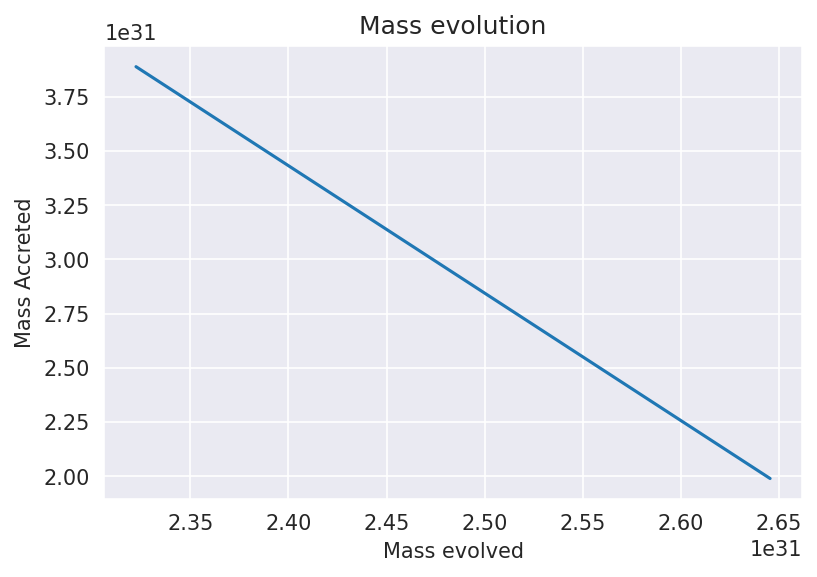

In [86]:
M_sun=1.989e30
M_tot= 15*M_sun
M_acc=np.arange(10*M_sun,20*M_sun,1e30)
M_ev=-0.17*M_acc+M_tot
x=np.array(M_ev)
y=np.array(M_acc)

plt.figure(dpi=150)
plt.plot(x,y)

plt.xlabel('Mass evolved')
plt.ylabel('Mass Accreted')
plt.title('Mass evolution')
sb.set_style('darkgrid')
plt.show()
sb.set_style('darkgrid')
